In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [3]:
#reading data
df = pd.read_csv(r"C:\Users\dohah\Documents\Projects\Detecting Malaria Model\MachineLearningProject\data_set\healthcare_dataset.csv")

In [4]:
#data exploration 
print(df.head())
print(df['Test Results'].value_counts())
print(df.dtypes)

            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

In [5]:
#catigorycal processing 
categorical_cols = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')


In [6]:
#label target
label_enc = LabelEncoder()
df['Test Results Encoded'] = label_enc.fit_transform(df['Test Results'])

In [7]:
# X & Y matrices
X_cat = encoder.fit_transform(df[categorical_cols])
X_num = df[['Age', 'Billing Amount']] 
X = np.hstack([X_num.values, X_cat]) #hstack : horizontal stack <nums at left , one hot at right>
y = df['Test Results Encoded'] #target label

In [8]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,30.0,18856.281306,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,62.0,33643.327287,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,76.0,27955.096079,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,28.0,37909.782410,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,43.0,14238.317814,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [9]:
#split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y,
                                                    shuffle=True
                                                    )


Missing values

In [10]:
# KNN_imputer if needed

ME

In [11]:
# KNN
scaler = StandardScaler().fit(X_train)
normalized_x_train = scaler.transform(X_train)
normalized_x_test = scaler.transform(X_test)

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1,25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(normalized_x_train, y_train)

print(knn_gscv.best_params_)


y_pred_knn = knn_gscv.predict(normalized_x_test)


#results remove from here and drow graphs 
print("KNN Results:")
print(classification_report(y_test, y_pred_knn, target_names=label_enc.classes_))

{'n_neighbors': np.int64(1)}
KNN Results:
              precision    recall  f1-score   support

    Abnormal       0.43      0.43      0.43      3726
Inconclusive       0.42      0.43      0.43      3671
      Normal       0.44      0.43      0.43      3703

    accuracy                           0.43     11100
   macro avg       0.43      0.43      0.43     11100
weighted avg       0.43      0.43      0.43     11100



chatGPT

In [ ]:
# KNN
# pipe_knn = Pipeline([
#     ('scaler', StandardScaler()),
#     ('knn', KNeighborsClassifier())
# ])
# grid search
# param_grid = {'knn__n_neighbors': [3, 5, 7, 9]}
# grid_knn = GridSearchCV(pipe_knn, param_grid, cv=5)
# grid_knn.fit(X_train, y_train)
# print("أفضل k:", grid_knn.best_params_)
# y_pred_knn = grid_knn.predict(X_test)
# print("KNN Results:")
# print(classification_report(y_test, y_pred_knn, target_names=label_enc.classes_))

In [13]:
#linear regression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# from 3 -> 5 <need understanding>

# 3. Predict (regression output → float)
y_pred_float = lr_model.predict(X_test)

# 4. Convert float → closest class (rounding)
y_pred_lr = np.round(y_pred_float).astype(int)

# 5. Clip values (just in case: keep them within [0,2])
y_pred_lr = np.clip(y_pred_lr, 0, 2)


#results remove from here and drow graphs 
# 6. Evaluate
print("Linear Regression (used for multi-class classification) Results:")
print(classification_report(y_test, y_pred_lr, target_names=label_enc.classes_))

#delete
# print(lr_model.intercept_)
# print(lr_model.coef_)

Linear Regression (used for multi-class classification) Results:
              precision    recall  f1-score   support

    Abnormal       0.00      0.00      0.00      3726
Inconclusive       0.33      1.00      0.50      3671
      Normal       0.00      0.00      0.00      3703

    accuracy                           0.33     11100
   macro avg       0.11      0.33      0.17     11100
weighted avg       0.11      0.33      0.16     11100



C:\Users\dohah\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dohah\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dohah\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

Distribution of Test Results #need a look

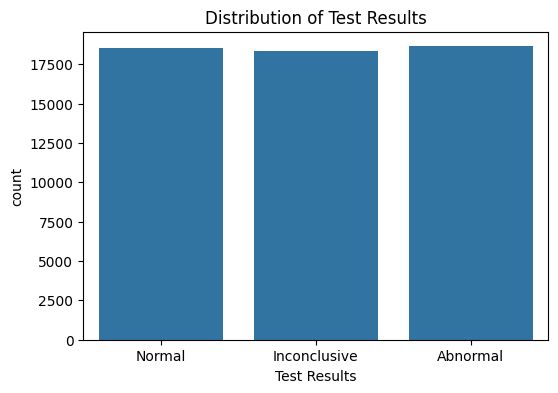

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='Test Results', data=df)
plt.title("Distribution of Test Results")
plt.show()

In [14]:
print("First 4 rows of X (numerical + one-hot features):")
print(X[:4])


First 4 rows of X (numerical + one-hot features):
[[3.00000000e+01 1.88562813e+04 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [6.20000000e+01 3.36433273e+04 0.00000000e+00 1.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.60000000e+01 2.79550961e+04 1.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00

confusion matrix # y_pred need to set right & nums should show on graph

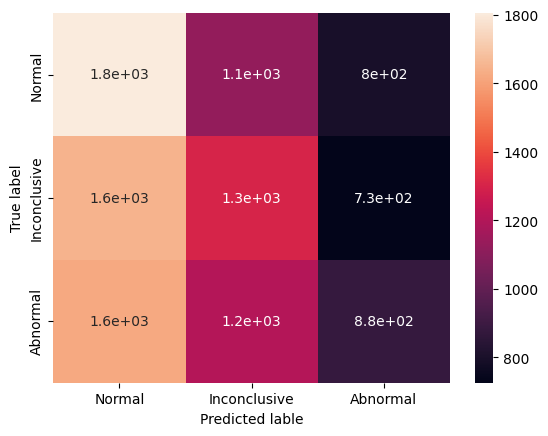

In [ ]:
cm = confusion_matrix(y_test, y_pred)  

cm_df = pd.DataFrame(cm,
                     index= df.iloc[:,-2].unique(),
                     columns= df.iloc[:,-2].unique())

sns.heatmap(cm_df, annot= True) # true meaning?
plt.ylabel('True label')
plt.xlabel('Predicted lable')
plt.show()



.
.
.
.

ALL after need to understand

.
.
.
.

Loos curve wrong way

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [28]:
mse = mean_squared_error(y_test, y_pred_knn)  # MSE as an evaluation metric
print(mse)

1.1354954954954954


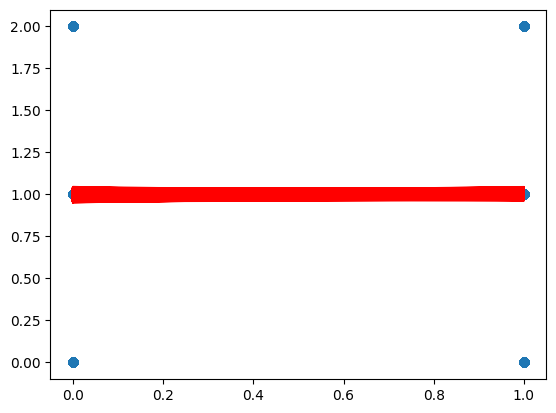

In [30]:
y_pred = model.predict(X)
plt.scatter(X[:,-3], y)
plt.plot(X[:,-3], y_pred, color='r')

Loos curve chatGPT way

In [49]:
lin_reg = LinearRegression()

# تدريب الموديل على بيانات التدريب
lin_reg.fit(X_train, y_train)

# التنبؤ على بيانات التدريب والاختبار
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)
y_pred_test_class = np.round(y_pred_test).astype(int)  # تقريب للقيم الصحيحة للفئات

# حساب MSE لكل من train و test
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Linear Regression MSE (train):", mse_train)
print("Linear Regression MSE (test):", mse_test)


Linear Regression MSE (train): 0.669025846714669
Linear Regression MSE (test): 0.6694408599679678


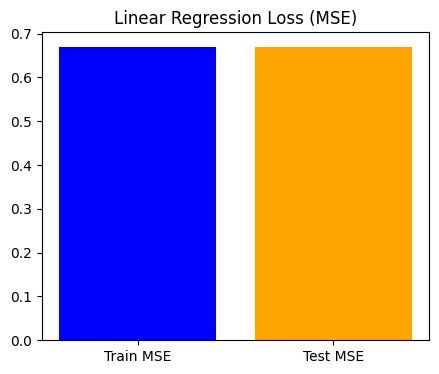

In [48]:
plt.figure(figsize=(5,4))
plt.bar(['Train MSE', 'Test MSE'], [mse_train, mse_test], color=['blue','orange'])
plt.title("Linear Regression Loss (MSE)")
plt.show()


Accuracy

In [51]:
# Linear Regression (بعد تقريب القيم)
acc_lr = accuracy_score(y_test, np.round(lin_reg.predict(X_test)).astype(int))
print("Linear Regression Accuracy:", acc_lr)

# KNN
acc_knn = accuracy_score(y_test, knn.predict(X_test))
print("KNN Accuracy:", acc_knn)


Linear Regression Accuracy: 0.33072072072072073
KNN Accuracy: 0.3589189189189189


ROC

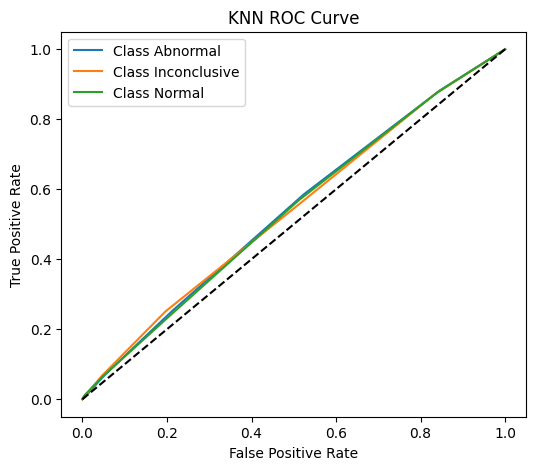

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=[0,1,2])  # إذا عندك 3 classes
n_classes = y_test_bin.shape[1]

# KNN probabilities
y_score_knn = knn.predict_proba(X_test)

plt.figure(figsize=(6,5))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_knn[:, i])
    plt.plot(fpr, tpr, label=f"Class {label_enc.classes_[i]}")
plt.plot([0,1], [0,1], 'k--')  # خط الصدفة
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN ROC Curve")
plt.legend()
plt.show()
